In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
columns = iris['feature_names'] + ['target']
data = pd.DataFrame(columns=iris['feature_names']+['target'],
                    data=np.concatenate([iris['data'], iris['target'].reshape(iris['target'].shape[0], 1)], axis=1))
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [2]:
# Нормализуем данные к диапазону от 0 до 1
data[iris['feature_names']] = (data[iris['feature_names']] - data[iris['feature_names']].min()) / (data[iris['feature_names']].max() - data[iris['feature_names']].min())
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0


In [3]:
# Отделяем признаки (X) от целевой переменной (y)
X_iris = data.drop(['target'], axis=1)
y_iris = data['target']
X_iris.shape, y_iris.shape

((150, 4), (150,))

# PCA (метод главных компонент) для визуализации данных
PCA ищет новые оси координат, по которым данные имеют наибольшую изменчивость, и затем проецирует данные на эти оси, чтобы получить новый набор переменных.

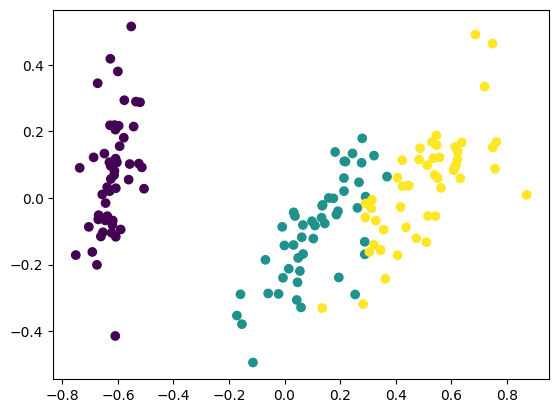

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Понижаем размерность данных для визуализации на плоскости
pca = PCA(n_components=2)
pca.fit(X_iris)
points = pca.transform(X_iris)

plt.scatter(points[:, 0], points[:, 1], c=y_iris)
plt.show()

## Алгоритм K-Means
Алгоритм K-means инициализирует k центроидов (центральная точка кластера) случайным образом. Ближайшая точка к центроиду относится к кластеру представленному этим центроидом. Далее итеративно подбираются оптимальные положения для этих точек.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


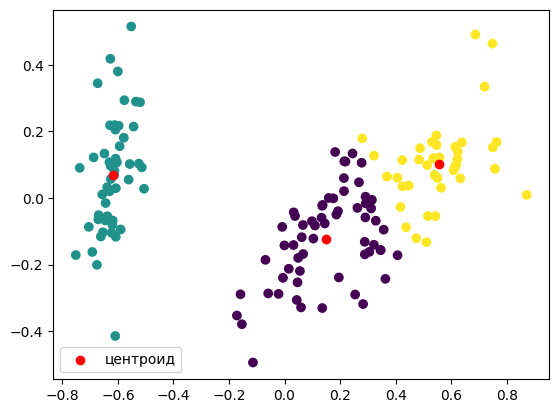

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
kmeans.fit(X_iris)
pred = kmeans.predict(X_iris)

# Понижаем размерность для координат центроидов для визализации на плоскости
center = pca.transform(kmeans.cluster_centers_)

plt.scatter(points[:, 0], points[:, 1], c=pred)
plt.scatter(center[:, 0], center[:, 1], c='red', label='центроид')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


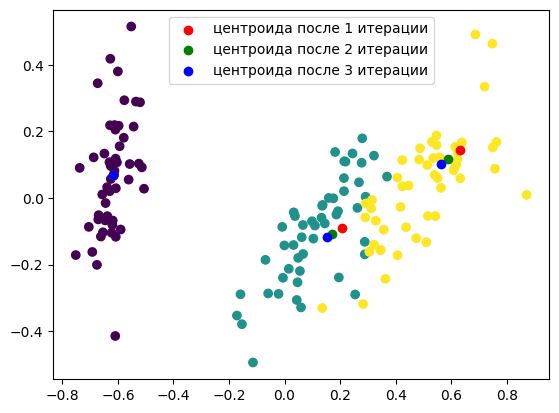

In [6]:
# Визуализируем как итеративно меняются координаты центроид
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1,
                      random_state=42)
kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=2,
                      random_state=42)
kmeans_iter3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=3,
                      random_state=42)

kmeans_iter1.fit(X_iris)
kmeans_iter2.fit(X_iris)
kmeans_iter3.fit(X_iris)

centers_iter1 = pca.transform(kmeans_iter1.cluster_centers_)
centers_iter2 = pca.transform(kmeans_iter2.cluster_centers_)
centers_iter3 = pca.transform(kmeans_iter3.cluster_centers_)

plt.scatter(points[:, 0], points[:, 1], c=y_iris)
plt.scatter(centers_iter1[:, 0], centers_iter1[:, 1], c='red',
            label='центроида после 1 итерации')
plt.scatter(centers_iter2[:, 0], centers_iter2[:, 1], c='green',
            label='центроида после 2 итерации')
plt.scatter(centers_iter3[:, 0], centers_iter3[:, 1], c='blue',
            label='центроида после 3 итерации')
plt.legend()
plt.show()

### Инерция
Качество размещения центроид можно оценить с помощью инерции.
Инерция представляет собой сумму квадратов расстояний от каждой точки данных до ее ближайшего центра кластера.

In [7]:
kmeans.inertia_

6.982216473785236

С помощью инерции можно определить оптимальное количество кластеров.

Необходимо построить график зависимости инерции от количества кластеров. На графике необходимо найти локоть (Elbow Method), это число кластеров и будет оптимальным.


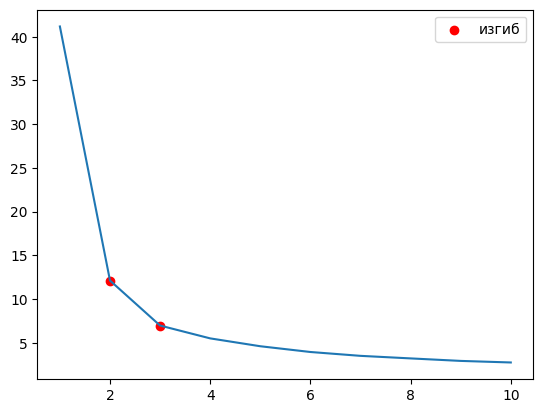

In [8]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=1, random_state=42).fit(X_iris)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 11), inertias)
plt.scatter([2, 3], inertias[1:3], c='red', label='изгиб')
plt.legend()
plt.show()

По графику видно что оптимальное количество кластеров для наших данных - 2 и 3.

### Где KMeans не справляется

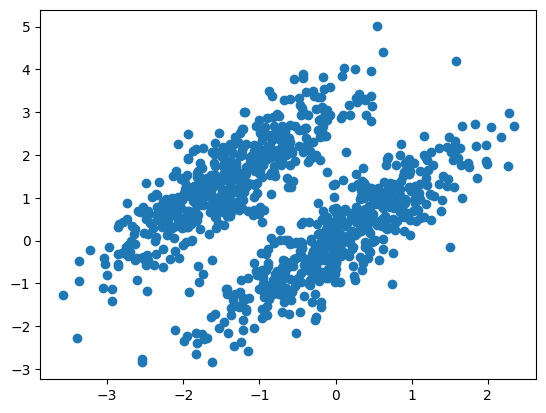

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X = X.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

plt.scatter(X[:, 0], X[:, 1])

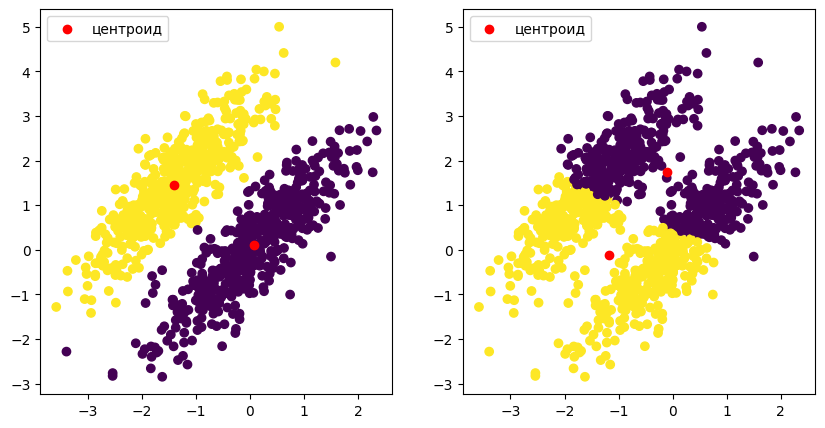

In [10]:
# KMeans выдает не стабильный результат в зависимости от того, как инициализировались центроиды
kmeans_correct = KMeans(n_clusters=2, init="random", n_init=1, random_state=42)
kmeans_incorrect = KMeans(n_clusters=2, init="random", n_init=1, random_state=40)

kmeans_correct.fit(X)
kmeans_incorrect.fit(X)

pred_correct = kmeans_correct.predict(X)
pred_incorrect = kmeans_incorrect.predict(X)

# визуализация
fig, axes = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
axes[0].scatter(X[:, 0], X[:, 1], c=pred_correct)
axes[0].scatter(kmeans_correct.cluster_centers_[:, 0],
                kmeans_correct.cluster_centers_[:, 1],
                c='red', label='центроид')
axes[0].legend()

axes[1].scatter(X[:, 0], X[:, 1], c=pred_incorrect)
axes[1].scatter(kmeans_incorrect.cluster_centers_[:, 0],
                kmeans_incorrect.cluster_centers_[:, 1],
                c='red', label='центроид')
axes[1].legend()

plt.show()

## DBSCAN
Density-based spatial clustering of applications with noise, плотностной алгоритм пространственной кластеризации с присутствием шума.
DBSCAN ищет области с высокой плотностью точек и считает их кластерами, игнорируя области с низкой плотностью.

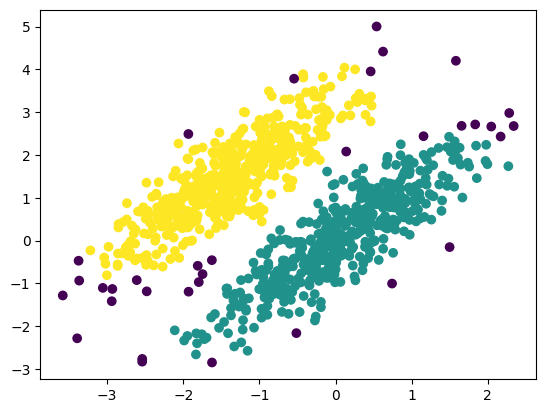

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5) # указываем расстояние между точками одного кластера (eps) и минимальное количество точек в кластере (min_samples)
pred = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

In [12]:
# Где '-1' - это выбросы, а остальные числа - кластера
np.unique(pred)

array([-1,  0,  1])

# Еще несколько популярных методов кластеризации

## Агломеративная кластеризация
процесс группировки похожих экземпляров начинается с создания нескольких групп, где каждая группа содержит один объект на начальном этапе, затем он находит две наиболее похожие группы, объединяет их.

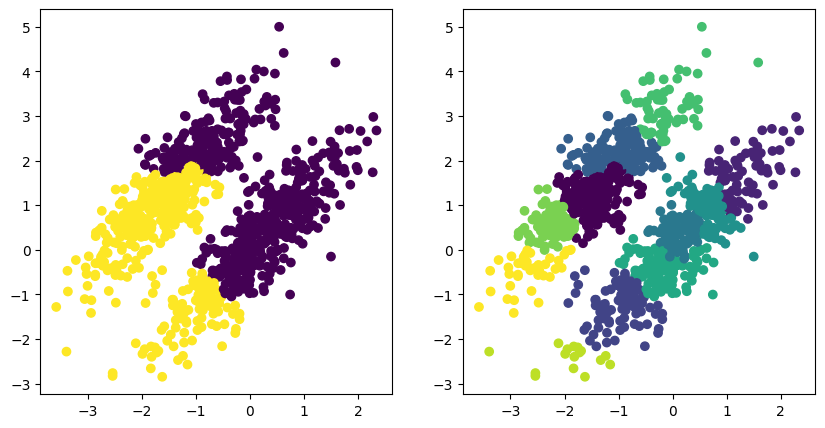

In [19]:
from sklearn.cluster import AgglomerativeClustering

# Используя количество кластеров
pred1 = AgglomerativeClustering(n_clusters=2,).fit_predict(X)
# Используя дистанции между точками (важно указать n_clusters=None)
pred2 = AgglomerativeClustering(distance_threshold=6, n_clusters=None).fit_predict(X)

fig, axes = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
axes[0].scatter(X[:, 0], X[:, 1], c=pred1)
axes[1].scatter(X[:, 0], X[:, 1], c=pred2)
plt.show()

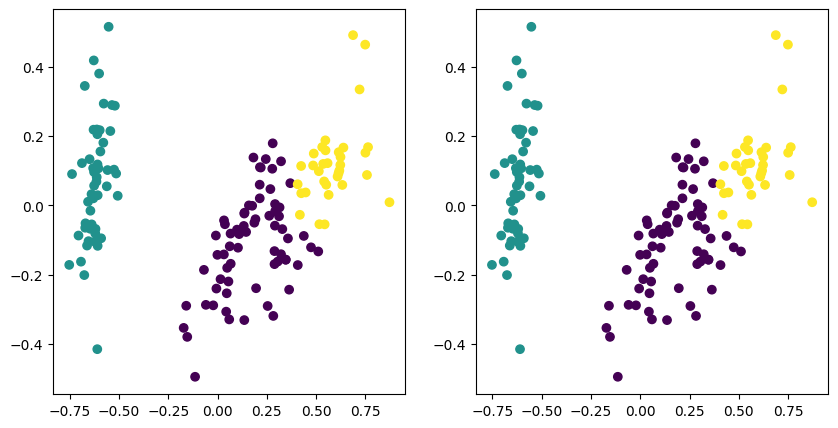

In [18]:
from sklearn.cluster import AgglomerativeClustering

# Используя количество кластеров
pred1 = AgglomerativeClustering(n_clusters=3).fit_predict(X_iris)
# Используя дистанции между точками
pred2 = AgglomerativeClustering(distance_threshold=2, n_clusters=None).fit_predict(X_iris)

fig, axes = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
axes[0].scatter(points[:, 0], points[:, 1], c=pred1)
axes[1].scatter(points[:, 0], points[:, 1], c=pred2)
plt.show()


# Gaussian Mixture
Гауссова смесь - это способ описания сложных распределений, который использует несколько гауссовых функций с разными параметрами. Каждая из этих функций вносит свой вклад в итоговое распределение, что позволяет моделировать данные с более высокой точностью. Эта модель широко используется в статистике, машинном обучении и компьютерном зрении для кластеризации и анализа данных.

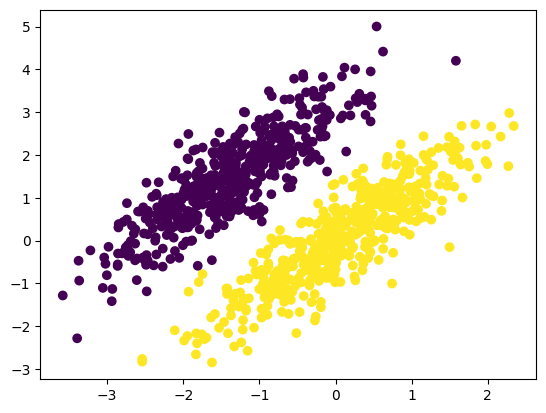

In [20]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
pred = gm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

# Другие методы понижения размерности

## Многомерное шкалирование
Понижает размерность, одновременно пытаясь сохранить расстояние между образцами.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


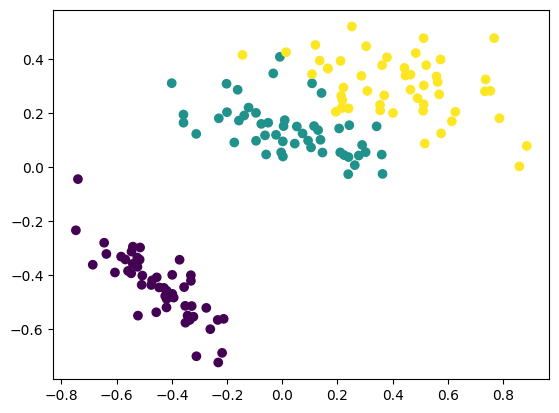

In [21]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_iris)

plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=y_iris)
plt.show()

## Изометрические отображения
Создает граф, соединяя каждый образец с его ближайшими соседями и затем понижает размерность, одновременно пытаясь сохранить геодезическое расстояние (количество ребер между вершинами графа) между образцами.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


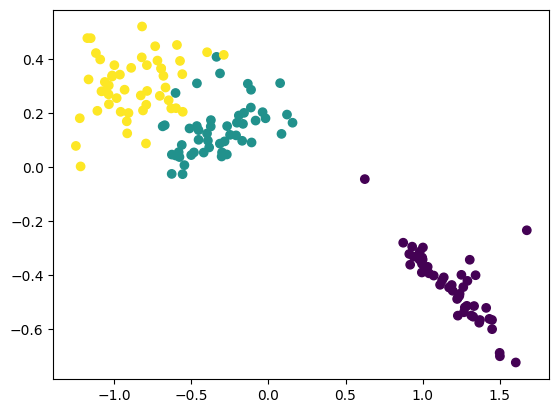

In [22]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_iris)

plt.scatter(X_reduced_isomap[:, 0], X_reduced_mds[:, 1], c=y_iris)
plt.show()